# Experiment 04

This Experiment is the main experiment of the work, consists in run an optimized Random Forest in order to try to predict the values in question.(https://www.researchgate.net/publication/221533996_From_an_artificial_neural_network_to_a_stock_market_day-trading_system_A_case_study_on_the_BMF_BOVESPA).

studying feature importance

In [1]:
import numpy as np
import pandas as pd

import Utils 
from Utils import calculateEMA, calculateBB, addPreviousDays, removeColumns, getPeriod, mape, mae, createDate, getDate, printResult

import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

### Constants and Parameters

In [2]:
dfColumns = ['date','open', 'high', 'low','close','tickvol','volume','spread']
newColumns = ['open', 'high', 'low', 'close']
col15 = ['open','d-5_high','d-5_low','d-4_high','d-4_low','d-3_high','d-3_low','d-2_high','d-2_low','d-1_high','d-1_low','EMA_high','EMA_low','UB_close','LB_close']
col25 = ['open','d-5_open','d-5_high','d-5_low','d-5_close','d-4_open','d-4_high','d-4_low','d-4_close','d-3_open','d-3_high','d-3_low','d-3_close','d-2_open','d-2_high','d-2_low','d-2_close','d-1_open','d-1_high','d-1_low','d-1_close','EMA_high' ,'EMA_low','UB_close','LB_close']
DAYS = 5
TEST_BEGIN = '2021.04.06'
TEST_END = '2021.06.01'
TRAIN_BEGIN = '2020.03.31'
TRAIN_END = '2021.04.05'
TIMES = 10

### Opening the dataset

In [3]:
df = pd.read_csv('../Data/PETR4_Daily.csv', sep = "\t")
df.columns = dfColumns
df = removeColumns(df, ['tickvol', 'volume','spread'])

df2 = pd.read_csv('../Data/VALE3_Daily.csv', sep = "\t")

df2.columns = dfColumns
df2 = removeColumns(df2, ['tickvol', 'volume','spread'])

df 
df.tail(290)

,date,open,high,low,close
1049,2020.03.31,13.16,14.07,13.16,13.54
1050,2020.04.01,13.01,14.08,12.89,13.84
1051,2020.04.02,14.90,16.01,14.52,15.01
1052,2020.04.03,15.77,15.83,14.44,14.84
1053,2020.04.06,15.53,15.58,14.69,15.26
...,...,...,...,...,...
1334,2021.05.26,25.91,26.18,25.65,26.09
1335,2021.05.27,26.08,26.25,25.77,25.91
1336,2021.05.28,26.20,27.02,26.15,26.99
1337,2021.05.31,26.96,27.20,26.78,26.87


In [4]:
#PETR4
df = calculateEMA(df,DAYS,newColumns)
df = calculateBB(df,DAYS,newColumns)
df = addPreviousDays(df,DAYS, newColumns)

#VALE3
df2 = calculateEMA(df2,DAYS,newColumns)
df2 = calculateBB(df2,DAYS,newColumns)
df2 = addPreviousDays(df2,DAYS, newColumns)

In [5]:
##df = getPeriod(df, '2020.03.02','2021.04.30', True)
##initialDf = getPeriod(df, '2020.03.02','2021.04.30', True)

In [6]:
initialDf_PETR4 = getPeriod(df, '2019.01.02','2021.06.01', True)
initialDf_VALE3 = getPeriod(df2, '2019.01.02','2021.06.01', True)

In [7]:
initialDf_PETR4

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2019.01.02,21.18,22.73,20.93,22.60,20.609175,21.499077,20.380957,21.271656,21.776315,...,19.18,20.37,19.55,20.08,19.41,19.69,20.38,20.39,19.50,19.63
1,2019.01.03,22.51,23.32,22.36,23.16,21.242783,22.106051,21.040638,21.901104,23.157151,...,19.99,20.36,19.34,20.37,19.18,20.37,19.55,20.08,19.41,19.69
2,2019.01.04,23.35,23.43,22.99,23.22,21.945189,22.547367,21.690425,22.340736,24.186721,...,20.74,21.31,20.22,20.65,19.99,20.36,19.34,20.37,19.18,20.37
3,2019.01.07,23.35,24.35,23.20,23.59,22.413459,23.148245,22.193617,22.757157,24.644733,...,20.93,22.60,20.77,21.45,20.74,21.31,20.22,20.65,19.99,20.36
4,2019.01.08,23.86,23.88,23.27,23.45,22.895640,23.392163,22.552411,22.988105,24.953473,...,22.36,23.16,21.18,22.73,20.93,22.60,20.77,21.45,20.74,21.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2021.05.26,25.91,26.18,25.65,26.09,26.114791,26.354219,25.760657,26.042263,26.608719,...,25.94,25.95,26.15,26.28,25.72,25.93,25.85,26.35,25.80,26.15
595,2021.05.27,26.08,26.25,25.77,25.91,26.103194,26.319479,25.763771,25.998175,26.604087,...,25.99,26.39,26.08,26.31,25.94,25.95,26.15,26.28,25.72,25.93
596,2021.05.28,26.20,27.02,26.15,26.99,26.135462,26.552986,25.892514,26.328784,26.617551,...,25.78,25.84,26.28,26.52,25.99,26.39,26.08,26.31,25.94,25.95
597,2021.05.31,26.96,27.20,26.78,26.87,26.410308,26.768657,26.188343,26.509189,27.147657,...,25.65,26.09,26.48,26.62,25.78,25.84,26.28,26.52,25.99,26.39


In [8]:
initialDf_VALE3

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2019.01.02,45.72,46.96,45.52,46.71,45.965361,46.778539,45.580846,46.324671,46.091838,...,45.16,46.11,45.97,46.85,45.91,46.50,46.39,46.78,45.21,45.54
1,2019.01.03,46.44,46.57,44.25,44.80,46.123574,46.709026,45.137231,45.816447,46.532241,...,45.05,45.25,45.81,46.35,45.16,46.11,45.97,46.85,45.91,46.50
2,2019.01.04,45.55,47.95,45.55,47.71,45.932382,47.122684,45.274820,46.447631,46.581616,...,45.94,46.63,45.80,46.07,45.05,45.25,45.81,46.35,45.16,46.11
3,2019.01.07,48.34,49.05,47.28,47.46,46.734922,47.765123,45.943214,46.785088,48.670273,...,45.52,46.71,45.99,46.81,45.94,46.63,45.80,46.07,45.05,45.25
4,2019.01.08,47.72,48.27,47.19,47.91,47.063281,47.933415,46.358809,47.160058,49.216909,...,44.25,44.80,45.72,46.96,45.52,46.71,45.99,46.81,45.94,46.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2021.05.26,106.37,110.32,106.03,110.20,109.166674,111.131617,107.622606,109.807900,113.973861,...,108.50,109.40,111.70,112.10,110.20,111.11,112.10,112.78,109.84,112.25
595,2021.05.27,110.80,112.09,109.77,110.99,109.711116,111.451078,108.338404,110.201933,113.405981,...,107.51,109.78,111.11,111.25,108.50,109.40,111.70,112.10,110.20,111.11
596,2021.05.28,111.11,112.75,109.42,111.59,110.177411,111.884052,108.698936,110.664622,113.405981,...,106.78,107.05,108.00,110.14,107.51,109.78,111.11,111.25,108.50,109.40
597,2021.05.31,112.50,114.89,112.50,114.78,110.951607,112.886035,109.965957,112.036415,114.811204,...,106.03,110.20,110.28,110.89,106.78,107.05,108.00,110.14,107.51,109.78


#### Experimento 04: Utilizando Random Forest

In [9]:
def exp04(df, stock, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    #print(df)
    
    df_train = getPeriod(df, TRAIN_BEGIN, TRAIN_END)
    df_test = getPeriod(df, TEST_BEGIN, TEST_END)
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    rf = RandomForestRegressor(n_estimators = 500)
    rf.fit(x_train, y_train);
    y_pred = rf.predict(x_test)
    
    errorMax = mape(y_test['high'],y_pred[:,0])
    errorMin = mape(y_test['low'],y_pred[:,1])
    
    #print (mape(y_test['high'],y_pred[:,0]))
    #print (mape(y_test['low'],y_pred[:,1]))
    #print (mae(y_test['high'],y_pred[:,0]))
    #print (mae(y_test['low'],y_pred[:,1]))
    
    return errorMax, errorMin

def test30timesExp04(df,stock, phrase, columnInput = []):
    errorMax = []
    errorMin = []
    
    for i in range(1, TIMES+1):
        if(columnInput == []):
            errorMax_petr4, errorMin_petr4 = exp04(df, stock)
        else: 
            errorMax_petr4, errorMin_petr4 = exp04(df, stock, columnInput)
            
        errorMax.append(errorMax_petr4[0])
        errorMin.append(errorMin_petr4[0])
    
    errorMax = np.array(errorMax)
    errorMin = np.array(errorMin)
    print(phrase)
    printResult((errorMax.mean(),errorMax.std()), 'High')
    printResult((errorMin.mean(),errorMin.std()), 'Low')
    
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 15 Variables', col15) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 25 Variables', col25) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 33 Variables') 
print('\n')
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 15 Variables', col15) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 25 Variables', col25) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 33 Variables')     

PETR4 15 Variables
High: 1.15 +- 0.04 %
Low: 0.63 +- 0.01 %
PETR4 25 Variables
High: 1.17 +- 0.04 %
Low: 0.65 +- 0.02 %
PETR4 33 Variables
High: 1.1 +- 0.03 %
Low: 0.66 +- 0.03 %


VALE3 15 Variables
High: 8.09 +- 0.05 %
Low: 8.76 +- 0.04 %
VALE3 25 Variables
High: 8.16 +- 0.06 %
Low: 8.83 +- 0.04 %
VALE3 33 Variables
High: 8.03 +- 0.05 %
Low: 8.69 +- 0.04 %


### Feature Importance For PETR4

In [53]:
df4 = getPeriod(initialDf_PETR4, '2020.03.02','2021.04.30', True)

df_train = getPeriod(df4, '2020.03.02','2021.03.31')
df_test = getPeriod(df4, '2021.04.01','2021.04.30')

x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
y_train = df_train[['high','low']]

x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
y_test = df_test[['high','low']]

rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train);
y_pred = rf.predict(x_test)

printResult(mape(y_test['high'],y_pred[:,0]),'High')
printResult(mape(y_test['low'],y_pred[:,1]), 'Low')
#print (mae(y_test['high'],y_pred[:,0]))
#print (mae(y_test['low'],y_pred[:,1]))

High: 1.27 +- 1.16 %
Low: 0.81 +- 0.66 %


In [36]:
'''importance = rf.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

from matplotlib import pyplot as plt
plt.barh(x_train.columns, rf.feature_importances_)'''

"importance = rf.feature_importances_\n\nfor i,v in enumerate(importance):\n    print('Feature: %0d, Score: %.5f' % (i,v))\n\nfrom matplotlib import pyplot as plt\nplt.barh(x_train.columns, rf.feature_importances_)"

Index(['d-3_open', 'd-3_high', 'd-4_open', 'd-4_low', 'd-4_high', 'd-5_high',
       'd-4_close', 'd-5_low', 'd-5_close', 'd-5_open', 'd-3_close',
       'd-2_open', 'd-2_high', 'EMA_open', 'd-3_low', 'UB_open', 'd-2_close',
       'UB_high', 'UB_low', 'd-2_low', 'UB_close', 'LB_low', 'd-1_open',
       'EMA_high', 'LB_high', 'EMA_low', 'd-1_high', 'LB_close', 'LB_open',
       'd-1_low', 'EMA_close', 'd-1_close', 'open'],
      dtype='object')
[1.24145028e-04 1.28682455e-04 1.43024275e-04 1.60156156e-04
 1.61337411e-04 1.66089299e-04 1.72400726e-04 1.84328823e-04
 1.93881131e-04 2.25703985e-04 2.52476857e-04 2.55172483e-04
 2.71204895e-04 3.43866515e-04 3.77913719e-04 6.05154910e-04
 8.35667446e-04 9.50124710e-04 1.09663906e-03 1.21272336e-03
 1.41981594e-03 2.14670477e-03 2.53319801e-03 3.47763539e-03
 5.60009499e-03 7.54697891e-03 8.47768289e-03 1.09568182e-02
 1.22478169e-02 1.23891932e-02 1.37156453e-02 2.23636619e-02
 8.89264060e-01]


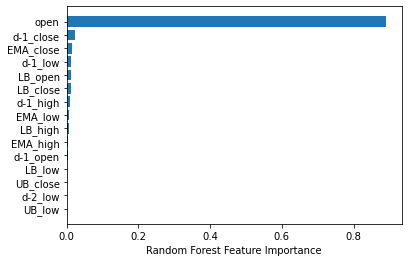

In [54]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx[18:]], rf.feature_importances_[sorted_idx[18:]])
plt.xlabel("Random Forest Feature Importance")
print(x_train.columns[sorted_idx])
print(rf.feature_importances_[sorted_idx])

In [55]:
#print(x_train.columns[sorted_idx[28:]])
Top5 = np.array(x_train.columns[sorted_idx[28:]])
Top10 = np.array(x_train.columns[sorted_idx[23:]])
Top15 = np.array(x_train.columns[sorted_idx[18:]])

test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 TOP 5 Variables', Top5)
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 TOP 10 Variables', Top10) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 TOP 15 Variables', Top15) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 15 Variables', col15) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 25 Variables', col25) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 33 Variables') 

PETR4 TOP 5 Variables
High: 1.13 +- 0.02 %
Low: 0.77 +- 0.03 %
PETR4 TOP 10 Variables
High: 1.21 +- 0.02 %
Low: 0.78 +- 0.02 %
PETR4 TOP 15 Variables
High: 1.13 +- 0.03 %
Low: 0.71 +- 0.02 %
PETR4 15 Variables
High: 1.13 +- 0.03 %
Low: 0.63 +- 0.01 %
PETR4 25 Variables
High: 1.16 +- 0.04 %
Low: 0.66 +- 0.01 %
PETR4 33 Variables
High: 1.12 +- 0.04 %
Low: 0.66 +- 0.02 %


### Feature Importance For VALE3

In [38]:
df5 = getPeriod(initialDf_VALE3, '2020.03.02','2021.04.30', True)

df_train = getPeriod(df5, '2020.03.02','2021.03.31')
df_test = getPeriod(df5, '2021.04.01','2021.04.30')

x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
y_train = df_train[['high','low']]

x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
y_test = df_test[['high','low']]

rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train);
y_pred = rf.predict(x_test)

printResult(mape(y_test['high'],y_pred[:,0]),'High')
printResult(mape(y_test['low'],y_pred[:,1]), 'Low')
#print (mae(y_test['high'],y_pred[:,0]))
#print (mae(y_test['low'],y_pred[:,1]))

High: 6.46 +- 2.79 %
Low: 6.79 +- 2.89 %


Index(['LB_high', 'd-3_high', 'd-3_open', 'd-5_high', 'd-4_high', 'd-5_close',
       'd-4_close', 'd-4_open', 'd-5_low', 'd-2_open', 'd-1_close',
       'd-3_close', 'LB_low', 'd-1_high', 'd-5_open', 'd-2_high', 'd-4_low',
       'EMA_close', 'EMA_high', 'LB_close', 'UB_open', 'EMA_low', 'UB_high',
       'UB_low', 'LB_open', 'd-1_open', 'EMA_open', 'd-1_low', 'd-2_low',
       'd-2_close', 'd-3_low', 'UB_close', 'open'],
      dtype='object')
[0.00964049 0.0152919  0.01873119 0.01941815 0.02148666 0.02167885
 0.02186684 0.02196413 0.02351967 0.02361387 0.02451635 0.02610442
 0.02636515 0.0264113  0.02687049 0.028314   0.02912511 0.02932776
 0.02936224 0.02993671 0.03001685 0.03069585 0.03268701 0.03500271
 0.03529179 0.03571807 0.03627781 0.03819981 0.04065981 0.04132157
 0.04145744 0.05214039 0.07698561]


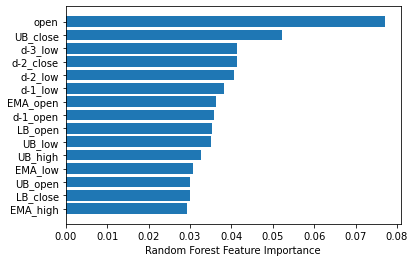

In [51]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx[18:]], rf.feature_importances_[sorted_idx[18:]])
plt.xlabel("Random Forest Feature Importance")
print(x_train.columns[sorted_idx])
print(rf.feature_importances_[sorted_idx])

In [52]:
#print(x_train.columns[sorted_idx[28:]])
Top5 = np.array(x_train.columns[sorted_idx[28:]])
Top10 = np.array(x_train.columns[sorted_idx[23:]])
Top15 = np.array(x_train.columns[sorted_idx[18:]])

test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 TOP 5 Variables', Top5)
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 TOP 10 Variables', Top10) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 TOP 15 Variables', Top15) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 15 Variables', col15) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 25 Variables', col25) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 33 Variables')

VALE3 TOP 5 Variables
High: 7.71 +- 0.08 %
Low: 8.53 +- 0.05 %
VALE3 TOP 10 Variables
High: 7.92 +- 0.06 %
Low: 8.62 +- 0.03 %
VALE3 TOP 15 Variables
High: 7.94 +- 0.05 %
Low: 8.64 +- 0.03 %
VALE3 15 Variables
High: 8.09 +- 0.06 %
Low: 8.78 +- 0.04 %
VALE3 25 Variables
High: 8.12 +- 0.09 %
Low: 8.8 +- 0.07 %
VALE3 33 Variables
High: 8.07 +- 0.05 %
Low: 8.7 +- 0.03 %


In [ ]:
def exp041(df, stock, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    
    #print(df)
    df_train = getPeriod(df, TRAIN_BEGIN, TRAIN_END)
    df_test = getPeriod(df, TEST_BEGIN, TEST_END)
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    for i in range(1, 5):    
        rf = RandomForestRegressor(n_estimators = 300)
        rf.fit(x_train, y_train);
        y_pred = rf.predict(x_test)
        
        print(i)
        errorMax = mape(y_test['high'],y_pred[:,0])
        errorMin = mape(y_test['low'],y_pred[:,1])
        printResult(errorMax, 'High')
        printResult(errorMin, 'Low')
    
    importance = rf.feature_importances_
    
    featureImp = []
    for feat, importance in zip(x_train.columns, rf.feature_importances_):  
        temp = [feat, importance*100]
        featureImp.append(temp)

    #fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
    #print (fT_df.sort_values('Importance', ascending = False))
    
    #print (mape(y_test['high'],y_pred[:,0]))
    #print (mape(y_test['low'],y_pred[:,1]))
    #print (mae(y_test['high'],y_pred[:,0]))
    #print (mae(y_test['low'],y_pred[:,1]))
    
    return errorMax, errorMin, y_pred, y_test

a,b,c,d = exp041(initialDf_PETR4, 'PETR4')

e,f,g,h = exp041(initialDf_VALE3, 'VALE3')

In [ ]:
printResult(a, 'High')
printResult(b, 'Low')

In [ ]:
d['high_pred'] = c[:,0]
d['low_pred'] = c[:,1]
d['date'] = getPeriod(initialDf_PETR4, TEST_BEGIN, TEST_END)['date']
d.to_pickle('../Data/PETR4_Pred.pkl')
d.tail(10)


In [ ]:
h['high_pred'] = g[:,0]
h['low_pred'] = g[:,1]
h['date'] = getPeriod(initialDf_VALE3, TEST_BEGIN, TEST_END)['date']
h.to_pickle('../Data/VALE3_Pred.pkl')
h.tail(10)

In [ ]:
initialDf_PETR4